# 단변량 데이터 분석과 시각화

- 일반적으로 관심의 대상이 되는 결과 값 Y가 하나인 경우의 데이터 분석

    - 모든 변수의 값, 범위 확인
    - 데이터 밀집 및 희소한 구간 확인
    - 결측치 및 이상치 확인
    - 데이터 수집 목적 등 사용 관점에서 특이 값 확인
    - 필요한 경우 데이터에 대한 스케일링 실시

- 데이터 준비

In [1]:
# 필요 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# 데이터 로드
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- PassengerId : 승객번호
- Survived : 생존 여부 (생존=1, 죽음=0)
- Pclass : 승객 등급 (1등급=1, 2등급=2, 3등급=3)
- Name : 승객명
- Sex : 성별
- Age : 나이
- Sibsp : 함께 탑승한 형제 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Ticket : 티켓 번호
- Fare : 탑승요금
- Cabin : 선실 번호
- Embarked : 탑승장소 (S=Southhampton, C=Cherbourg, Q=Queenstown)

- 데이터 확인

In [3]:
# 기초 기술 통계량 확인
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [15]:
# 데이터 구조 확인
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 데이터 정제

In [5]:
# 변수분할 및 불필요한 변수 삭제
x_data = titanic[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
y_data = titanic[['Survived']]

In [6]:
# 결측치 확인
x_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
# 결측치 확인
y_data.isnull().sum()

Survived    0
dtype: int64

In [13]:
# x_data 결측치 0 처리
x_data = x_data.fillna(0)

In [14]:
# 데이터 구조 확인
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     891 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [16]:
# 기초 통계량 확인
x_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.0,2.0000,3.0000,3.0,3.0000
Age,891.0,23.799293,17.596074,0.0,6.0000,24.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
# 이상치
x_data[x_data['Age'] < 1]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
305,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
469,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
803,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
831,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S


## 수치형

### sns.histplot()

- 특정 변수에 대한 빈도 분포를 나타내는 그래프

- 수집한 데이터가 정규분포를 이루고 있는지
- 특정 구간에 빈도가 몰려 있는 비대칭적인 분포를 이루고 있는지
- 이상한 값이 들어 있는지를 한 눈에 파악할 수 있습니다

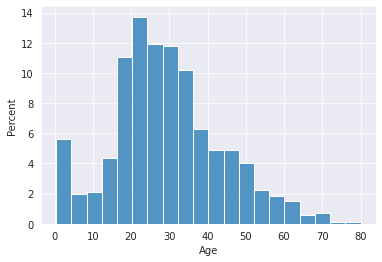

In [ ]:
# 나이 분포 - 분포 구간 자동 계산
sns.histplot(x=titanic.Age)
plt.show()

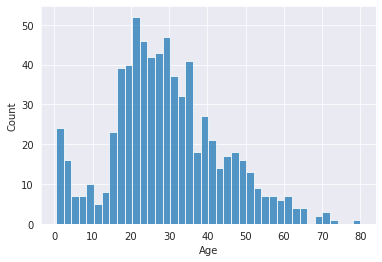

In [ ]:
# 나이 분포 - 분포 구간 40개로 수동 설정
sns.histplot(x=titanic.Age, bins=40)
plt.show()

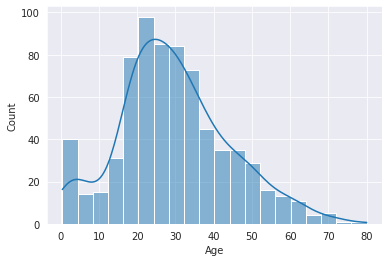

In [ ]:
# 나이 분포 - 커널 밀도 추정과 함께 출력
sns.histplot(x=titanic.Age, kde=True)
plt.show()

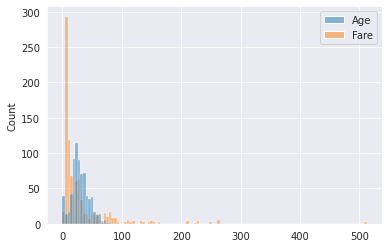

In [ ]:
# 서로 다른 규모의 데이터에 대한 histplot() - 시각화 오류
sns.histplot(data=titanic[['Age', 'Fare']])
plt.show()

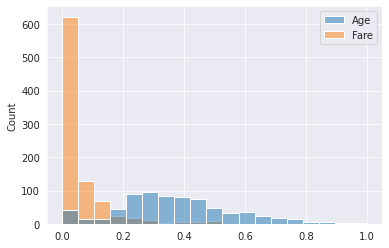

In [ ]:
# 서로 다른 규모의 데이터에 대한 histplot() - 시각화 오류 개선
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()  # 모든 데이터를 0~1사이 숫자로 변환
data = scaler.fit_transform(titanic[['Age', 'Fare']])
data = pd.DataFrame(data, columns=['Age', 'Fare'])

sns.histplot(data=data)
plt.show()

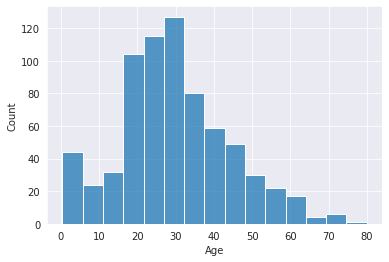

In [ ]:
# 연령 히스토그램 시각화 - 데이터셋과 변수를 개별 입력
sns.histplot(x='Age', data=x_data, bins=15)
plt.show()

### sns.kdeplot()

 - 빈포 분포를 부드럽게 만든 그래프 (변수가 가질 수 있는 모든 값의 밀도(확률)을 추정)

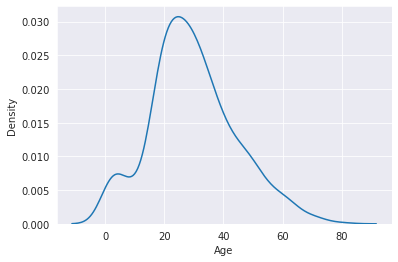

In [ ]:
# 나이 정보에 대한 커널 밀도 추정 시각화
sns.kdeplot(x="Age", data=titanic)
plt.show()

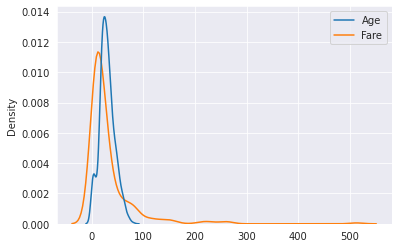

In [ ]:
# 나이와 요금 정보에 대한 커널 밀도 추정 시각화 - 시각화 오류
sns.kdeplot(data=titanic[["Age", "Fare"]])
plt.show()

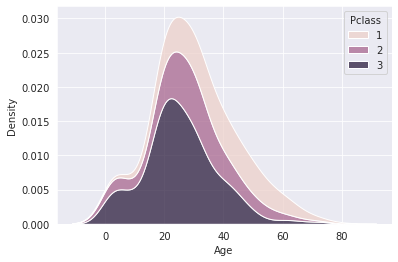

In [ ]:
# 승객등급별 나이 정보의 커널 밀도 추정 시각화
sns.kdeplot(x='Age', data=titanic, hue='Pclass', multiple='stack')
plt.show()

### sns.distplot()

- 히스토그램과 같은 시각화

<ipython-input-58-460e95c31aa7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_data['Age'])


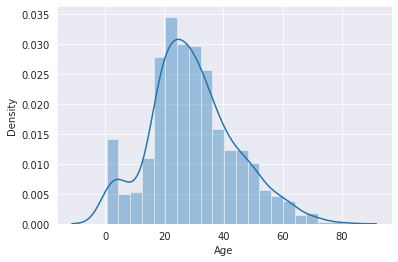

In [ ]:
# 연령 시각화 - deprecated function
sns.distplot(x_data['Age'])
plt.show()

### sns.boxplot()

- 단변량 또는 연속형 데이터의 분포(Distribution)를 설명
- 분포의 중심, 분산(Variance), 치우침(Skewness), 이상치(Outlier), 대칭성(Symmetry) 확인 가능

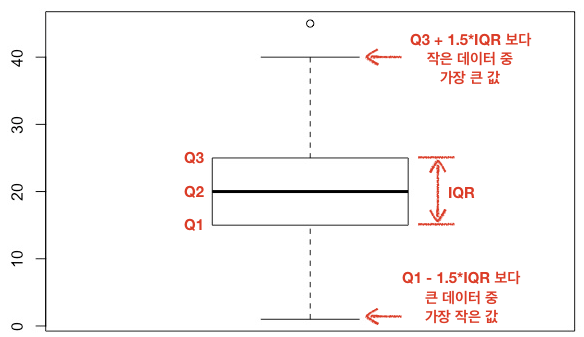

- Q1 : 1사분위 (25%)
- Q2 : 2사분위 (50%)
- Q3 : 3사분위 (75%)
- IQR = Q1과 Q3 사이의 길이 (Q3 - Q1)

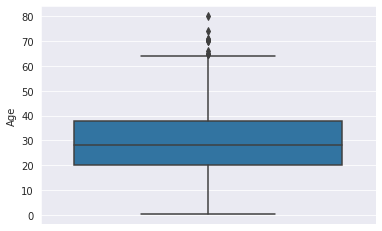

In [ ]:
# 연령 박스 플롯 시각화
sns.boxplot(y=x_data['Age'])
plt.show()

### sns.violinplot()

- 단변량 또는 연속형 데이터의 분포(Distribution)를 설명
- 분포의 중심, 분산(Variance), 치우침(Skewness), 이상치(Outlier), 대칭성(Symmetry) 확인 가능
- 커널 밀도 곡선(Kernel Density Curvce)와 박스 플롯을 합친 형태

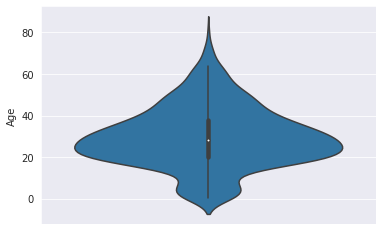

In [ ]:
# 연령 바이올린 플롯 시각화
sns.violinplot(y=x_data['Age'])
plt.show()

## 범주형

### sns.countplot()


- sns.countplot()을 사용하지 않는 경우

In [49]:
# Embarked별 합계 구하기
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [50]:
# Embarked별 합계 구한 결과 DataFrame 변환
df = pd.DataFrame(titanic.Embarked.value_counts())
df

,Embarked
S,644
C,168
Q,77


<BarContainer object of 3 artists>

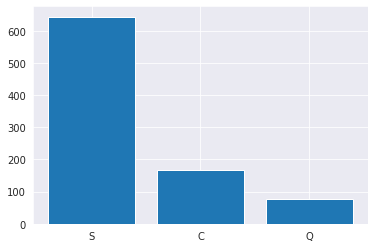

In [57]:
# matplotlib 을 이용하여 bar plot 그리기
plt.bar(df.index, df.Embarked)

<BarContainer object of 2 artists>

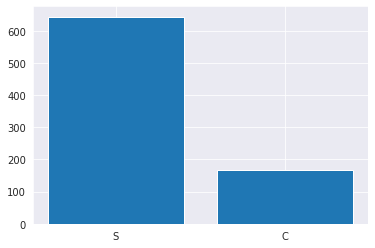

In [59]:
# matplotlib 을 이용하여 bar plot 그리기
plt.bar(df[:2].index, df[:2].Embarked)

 - 특정 변수에 대한 갯수 그래프

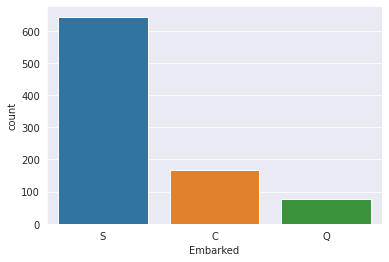

In [43]:
# Embarked 탑승처에 대한 시각화
sns.countplot(x=titanic.Embarked)
plt.show()

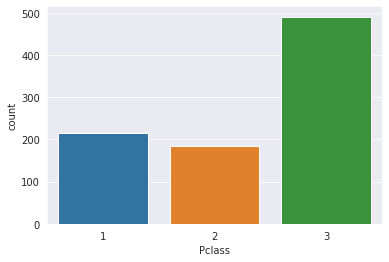

In [ ]:
# 승객 등급에 대한 시각화
sns.countplot(x=titanic.Pclass)
plt.show()

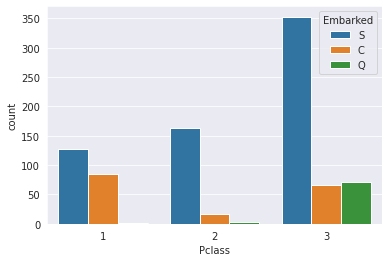

In [ ]:
# 승객 등급을 탑승처별 시각화
sns.countplot(x=titanic.Pclass, hue=titanic.Embarked, hue_order=['S', 'C', 'Q'])
plt.show()

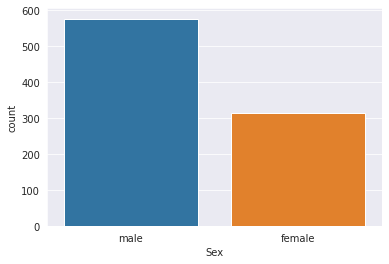

In [ ]:
# 성별 정보 시각화
sns.countplot(x=titanic.Sex)
plt.show()

### plt.pie()

- 범주형 데이터(Categorical Data, Object Data) 표현
- 전체와 부분을 비교하고자 할 때 사용
- 최대 6~8개를 넘지 않게 하고, 수치를 레이블로 명확하게 표시

In [ ]:
# 먼저 pie의 크기를 결정할 값(갯수)을 구한다.
em_data = x_data.groupby('Embarked').apply(len)
em_data = pd.DataFrame(em_data, columns=['col_cnt'])
em_data = em_data.reset_index()
em_data

,Embarked,col_cnt
0,C,168
1,Q,77
2,S,644


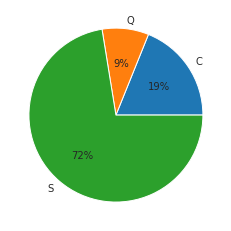

In [ ]:
# 승선지별 pie plot
data_x = em_data['col_cnt']
labels = em_data['Embarked']
plt.pie(data_x, labels=labels, autopct='%.0f%%')
plt.show()

## 인코딩

- 범주형 데이터를 수치화(X)

### Label 인코딩

In [ ]:
# 범주형 변수 인코딩 (수치화) : label 인코딩
# "=" 좌우가 같은 변수(객체)를 사용하는 경우 주의 필요 (2회 실행시)
sex_data = {'male':0 , 'female': 1}
x_data['Sex'] = x_data['Sex'].map(sex_data)
x_data

<ipython-input-164-e09f59871816>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_data['Sex'] = x_data['Sex'].map(sex_data)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


### One-Hot 인코딩

In [ ]:
# 범주형 변수 인코딩 (수치화) : one-hot 인코딩
x_data = pd.get_dummies(x_data, columns=['Sex'])
x_data

,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,Sex_0,Sex_1
0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,1
2,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,1,0,1
4,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,S,1,0,1,0
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S,0,1,0,1
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,1
889,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,C,1,0,1,0


## 커널 밀도 추정

- 커널 밀도 추정(KDE: Kernel Density Estimator) 이란 ?
  - 히스토그램(histogram)을 smoothing(스무딩)하는 것
  - 커널함수(kernel function)를 이용한 밀도추정 방법
    - 커널함수 : 원점을 중심으로 대칭이면서 적분값이 1인 Non-Negative 함수 (Gaussian, Uniform 등)
    - 밀도추정 : 표본들의 분포로부터 모집단의 (확률)분포 특성을 추정하는 것 (확률밀도)
$$\hat{f}_h (x) = {1 \over nh} \sum K ({X-X_i \over h})$$
$$n : 표본 데이터 갯수 $$
$$X : 변수 (random \ variable)$$
$$X_i : 1, 2, 3 ... 표본데이터$$
$$h : bandwidth (사용자 정의 값) $$


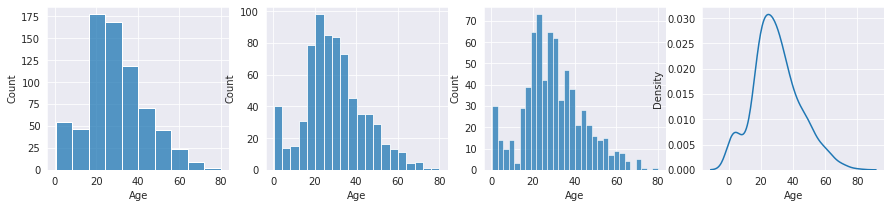

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=((15, 3)))
sns.histplot(x=titanic.Age, bins=10, ax=ax[0])
sns.histplot(x=titanic.Age, bins=20, ax=ax[1])
sns.histplot(x=titanic.Age, bins=30, ax=ax[2])
sns.kdeplot(x=titanic.Age, ax=ax[3])
plt.show()

- bins 수에 따라 막대가 나타나거나 없어집니다.
- y축 범위가 bins 값에 따라 작아집니다.

# 다변량 데이터 분석과 시각화

- 일반적으로 관심의 대상이 되는 결과 값 Y가 2개 이상인 경우의 데이터 분석

    - 모든 변수의 값, 범위 확인
    - 데이터 밀집 및 희소한 구간 확인
    - 결측치 및 이상치 확인
    - 데이터 수집 목적 등 사용 관점에서 특이 값 확인
    - 필요한 경우 데이터에 대한 스케일링 실시
<font color=red>변수간의 관계가 특이한 값 확인</font>

## 범주형, 수치형

- 데이터 준비

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [18]:
# 데이터 로드드
house = pd.read_csv('houseprice.csv')
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


- 데이터 확인

In [19]:
# 기초 기술 통계량 확인
house.describe()

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


In [20]:
# 자료 구조, 결측치 등 확인
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   27 non-null     float64
 1   tax     27 non-null     float64
 2   ground  27 non-null     float64
 3   floor   27 non-null     float64
 4   year    27 non-null     float64
dtypes: float64(5)
memory usage: 1.2 KB


In [24]:
# 중복 데이터 확인
house[house.duplicated()]

,price,tax,ground,floor,year


In [28]:
# 중복데이터 만들기 - 코드 오류가 있습니다. 수정해 보세요.
house.append(house[:2])

<ipython-input-28-4ea4e27fbd71>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  house = house.append(house[:2])


In [30]:
# 중복 데이터 확인
house[house.duplicated()]

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2


In [35]:
# 중복 데이터를 제거 - 코드 오류가 있습니다. 수정해 보세요.
house[house.duplicated()]

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2


In [ ]:
# 중복 데이터 확인
house[house.duplicated()]

- 데이터 정제

In [ ]:
# 범주형 데이터 무작위 생성 : 지역(locale)
city_loc = {0:'Daejon', 1:'DaeGu', 2:'Busan'}
house['locale'] = [city_loc[np.random.randint(3)] for x in range(len(house))]

### sns.scatterplot()

- 2개 이상의 변수에 대한 크기나 분포 등의 관계를 나타내는 그래프 (2 num, 1 cat 또는 3 num)
  - 수치형 vs 수치형 데이터의 상관 관계를 볼 때 주로 사용합니다.
  - 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.
  - 직교 좌표계를 이용해 두 개 변수 간의 관계를 나타내는 방법
  - 이상치를 확인하는 경우에 유용하게 사용
  - 범주형 데이터는 산점도로 나타낼 수 없음 (산점도와 함께 크기, 색상의 정보로는는 나타낼 수 있음)

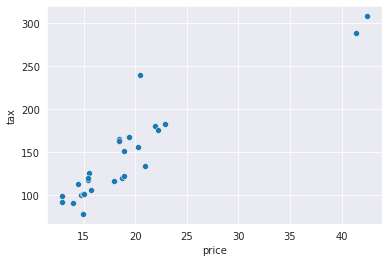

In [ ]:
# 기본 사용방법
sns.scatterplot(data=house, x="price", y="tax")
plt.show()

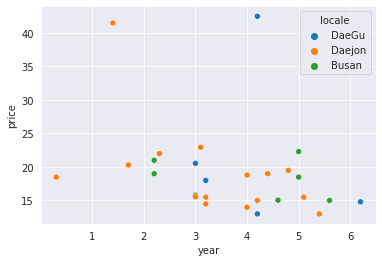

In [ ]:
# 지역 데이터를 색상으로 표시
sns.scatterplot(data=house, x="year", y="price", hue='locale')
plt.show()

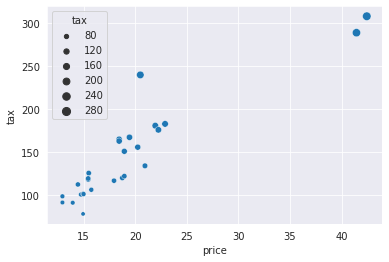

In [ ]:
# 점 크기를 Tax 로 결정하여 시각화
sns.scatterplot(data=house, x="price", y="tax", size='tax')
plt.show()

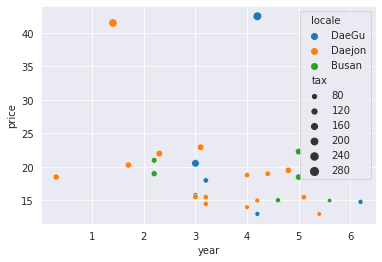

In [ ]:
# 점 크기를 Tax 로 결정하고, 지역을 색상으로 결정하여 시각화
sns.scatterplot(data=house, x="year", y="price", hue='locale', size='tax')
plt.show()

### sns.stripplot()

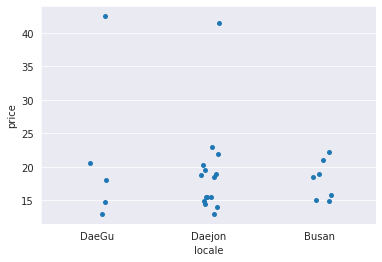

In [ ]:
# 범주형과 함께 출력하는 산점도 plot
sns.stripplot(data=house, x="locale", y="price")
plt.show()

### sns.pairplot()

- 수치형 변수들간의 상관관계 시각화
- 각 변수간의 히스토그램 확인 가능능
- 수치형 변수들과 범주형 변수를 사용함으로 분류적 특성을 시각화

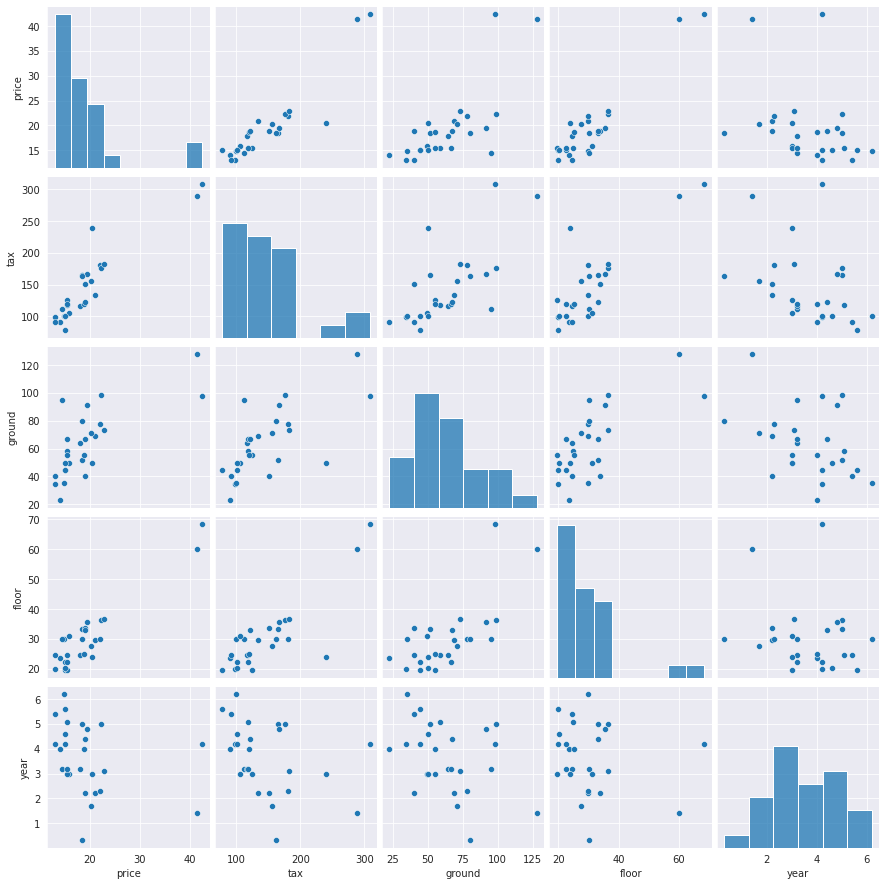

In [ ]:
# 기본 시각화
sns.pairplot(data=house)
plt.show()

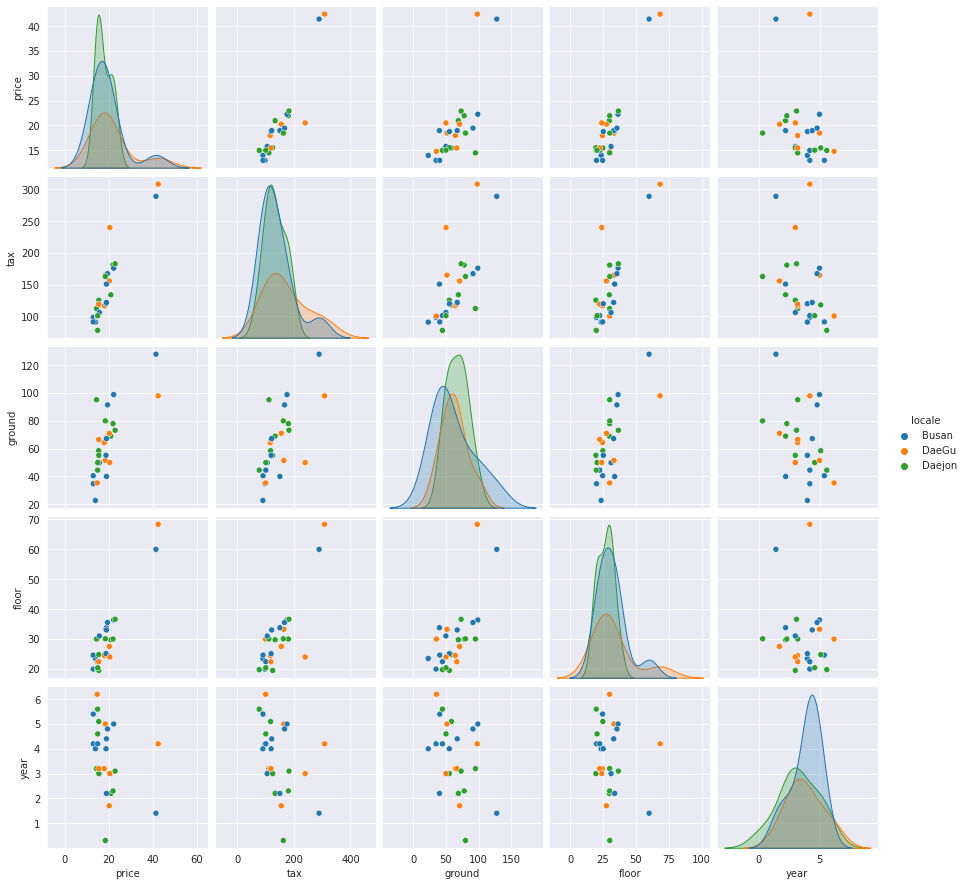

In [ ]:
# 범주형과 함께 시각화
sns.pairplot(data=house, hue='locale')
plt.show()

### sns.boxplot()

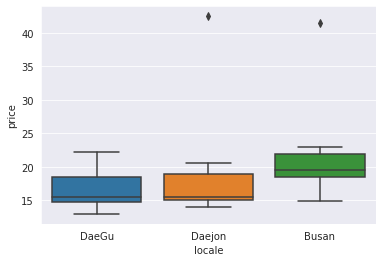

In [ ]:
# 연령, 등급별 박스 플롯 시각화
sns.boxplot(data=house, y='price', x='locale')
plt.show()

### sns.heatmap()

- 수치형 변수간의 상관 관계를 시각화
- 상관관계의 정도는 상관계수로 나타낼 수 있으며, -1 ~ 1 사이의 값을 갖는다.
  - -1 : 강한 음의 상관관계
  - 0 : 상관없음
  - 1 : 강한 양양의 상관관계

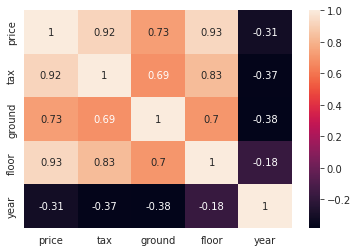

In [ ]:
# house 데이터셋의 모든 수치형 데이터에 대한 상관계수를 heatmap으로 출력
sns.heatmap(data=house.corr(), annot=True)
plt.show()

### sns.barplot()

- 특정 변수에 대한 통계값을 나타내는 그래프 (1 num, 2 cat)
  - 막대 그래프
  - 신뢰구간(ci 값, 기본 95%) 표현 가능

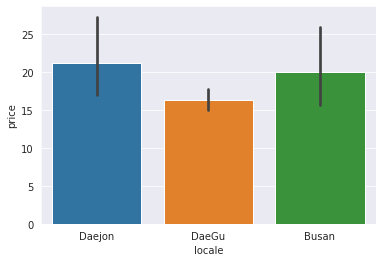

In [ ]:
# 지역별 price를 막대로 시각화
sns.barplot(data=house, x="locale", y="price")
plt.show()

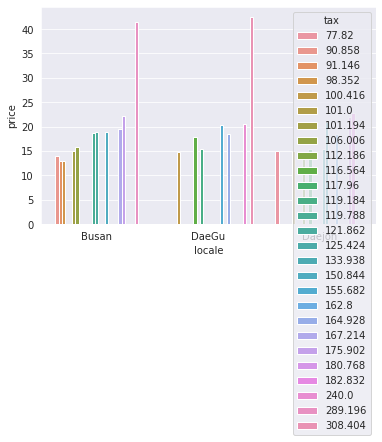

In [ ]:
# Tax값에 따라 지역별 price를 막대로 시각화 - 시각화 오류
sns.barplot(data=house, x="locale", y="price", hue='tax')
plt.show()

### sns.lineplot()

- 특정 변수에 대한 통계값을 나타내는 그래프 (1 num, 2 cat)
  - 각 값을 연속하는 선
  - 신뢰구간 값을 그림자(음영)로 표시 (단, 모수가 적은 경우 비출력)
  - 연령, 기간, 연도 등 연속형 변수 값의 변화 폭과 추세 시각화에 유용

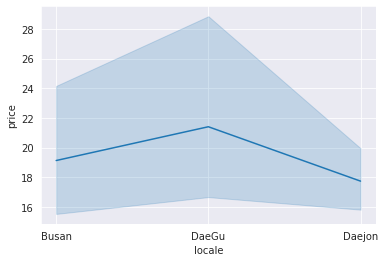

In [ ]:
# 지역별 가격을 line 으로 시각화
sns.lineplot(data=house, x="locale", y="price")
plt.show()

### sns.pointplot()

- 특정 변수에 대한 통계값을 나타내는 그래프 (1 num, 2 cat)
  - 각 수치가 위치한 곳을 점으로 출력
  - 점끼리 이어서 라인 출력
  - 신뢰구간 값을 라인으로 표시

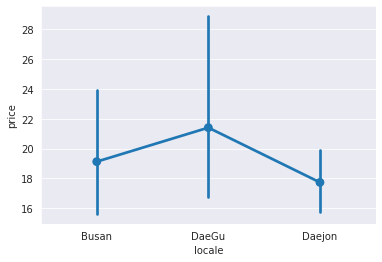

In [ ]:
sns.pointplot(data=house, x="locale", y="price")
plt.show()

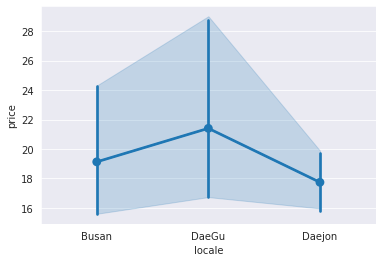

In [ ]:
# 2개 plot을 한번에 출력
sns.lineplot(data=house, x="locale", y="price")
sns.pointplot(data=house, x="locale", y="price")
plt.show()

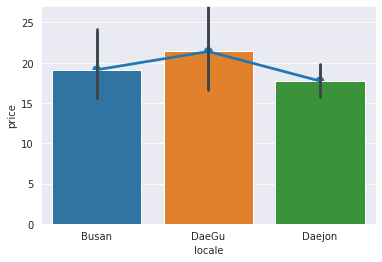

In [ ]:
# 2개 plot을 한번에 출력
plt.ylim([0, 27])
sns.pointplot(data=house, x="locale", y="price")
sns.barplot(data=house, x="locale", y="price")
plt.show()

# 시각화 방법 정리

|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**데이터 구분**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**변수 구분**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**가능한 시각화**&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|
|:-------------------------------:|:------------------------------:|:---------------------------:|
|단변량|연속형|histplot()|
|      |      |boxplot()|
|      |      |violinplot()|
|      |범주형|countplot()|
|      |      |barplot()|
|      |      |pieplot()|
|다변량|연속형|scatterplot()|
|      |      |lineplot()|
|      |범주형|mosaic graph|
|      |      |Tree Map|

<font size=5>[데이터 시각화](https://www.data-to-viz.com/) (https://www.data-to-viz.com/)</font>

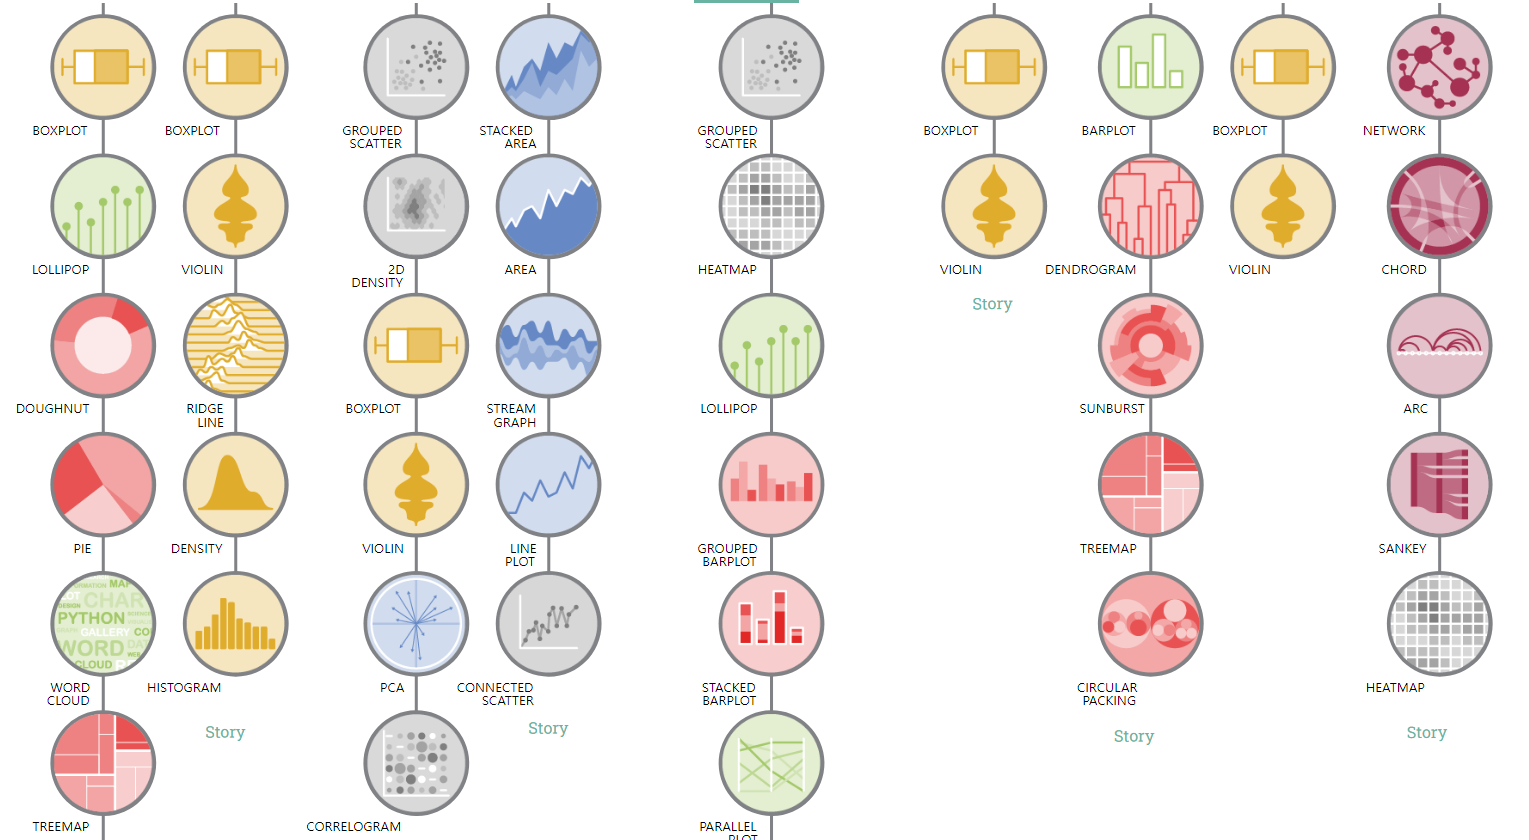

# 차원 축소와 시각화

- 차원축소 개념
  - 여러개의 데이터로 구성된 즉, 다차원의 데이터를 축소하여 특징을 찾는 기법
  - 찾아낸 특징은 원래 데이터로부터 나온 것이기 때문에 데이터로 사용 가능 (단, 오차발생)
- 용어 정비
  - 여러개의 데이터 = 컬럼이 여러개
  - 다차원 = 컬럼이 여러개
- Example

In [ ]:
# 패키지 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
# 데이터 로드
x_titanic = pd.read_csv('titanic.csv')
x_titanic = x_titanic.dropna()
x_titanic = x_titanic.reset_index(drop=True)
x_titanic = x_titanic[['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked', 'Survived', 'Age', 'Fare']]
x_titanic.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Survived,Age,Fare
0,1,female,1,0,C85,C,1,38.0,71.2833
1,1,female,1,0,C123,S,1,35.0,53.1000
2,1,male,0,0,E46,S,0,54.0,51.8625
3,3,female,1,1,G6,S,1,4.0,16.7000
4,1,female,0,0,C103,S,1,58.0,26.5500


In [ ]:
titanic = pd.get_dummies(x_titanic, columns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Cabin', 'Embarked'])
titanic 

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
179,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
180,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
181,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


## 주성분 분석(PCA)

- 깊이 있는 원리 이해를 위해서는 사전지식으로 공분산과 eigenvalue, eigenvector 이해 필요

### 예제

In [ ]:
titanic 

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
179,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
180,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
181,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# PCA 패키지 로드
from sklearn.decomposition import PCA

# 2개 컬럼으로 차원 축소
pca = PCA(n_components=2)
pca_titanic = pca.fit_transform(titanic)

In [ ]:
# 축소결과 데이터 확인
pca_titanic.shape

(183, 2)

In [ ]:
# 축소한 변수로 설명가능한 비율 확인
print('variance_ratio :', pca.explained_variance_ratio_)
print('sum of variance_ratio: ', np.sum(pca.explained_variance_ratio_))


variance_ratio : [0.95953799 0.03992594]
sum of variance_ratio:  0.9994639283412011


In [ ]:
# 축소된 차원정보를 DataFrame으로 변환
pca_titanic_df = pd.DataFrame(pca_titanic, columns=['col_1', 'col_2'])
pca_titanic_df

,col_1,col_2
0,-7.440273,2.178401
1,-25.563654,-1.186840
2,-27.180270,17.803116
3,-61.343483,-32.917389
4,-52.564078,21.282786
...,...,...
178,-26.343860,10.788678
179,-73.617908,-4.115691
180,4.077787,20.400026
181,-48.344268,-17.635187


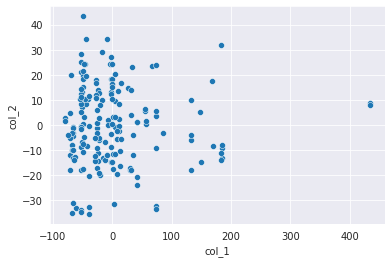

In [ ]:
# 2개의 수치형 변수 관계를 확인하기 위하여 시각화
sns.scatterplot(data=pca_titanic_df, x="col_1", y="col_2")
plt.show()

In [ ]:
# 목적변수(타겟변수)를 축소된 차원이 저장된 데이터프레임에 추가
pca_titanic_df['Survived'] = titanic['Survived']

<Axes: xlabel='col_1', ylabel='col_2'>

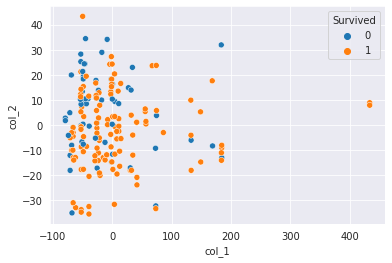

In [ ]:
# 축소된 차원의 값의 관계에서 목적변수의 위치를 시각화
sns.scatterplot(data=pca_titanic_df, x="col_1", y="col_2", hue='Survived')

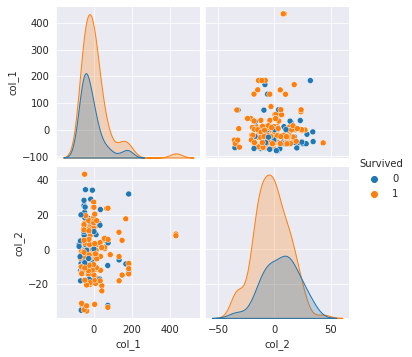

In [ ]:
# 축소된 차원의 값의 관계와 목적변수의 위치를 시각화
sns.pairplot(data=pca_titanic_df, hue='Survived')
plt.show()

- 생존자 구별이 잘 되지는 않음.
- PCA(n_components=n) 에서 n 값을 조정하면서 축소된 데이터의 유의미성 파악

## 특이값 분해(SVD)

- 행렬을 분해하여 차원을 축소하는 효과를 이용
- 임의의 행렬을 정보량에 따라 여러 layer로 분해가 가능
- 행렬 A는 U, Sigma, $V ^ T$ 라는 3개 행렬로 분해됨을 알고 축소된 Sigma 사용
- Vector간 의존성이 있으면 Sigma 값은 0

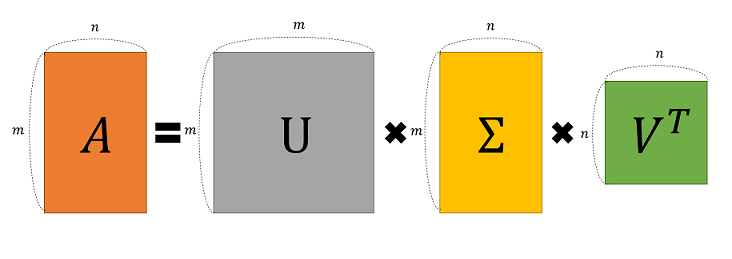

### 이해

In [ ]:
# SVD 모듈은 numpy에 포함되어 있음
import numpy as np
from numpy.linalg import svd

np.random.seed(42)  # 같은 값이 나오도록 난수 고정

# 6x4 임의 행렬 a 생성 
a = np.random.randn(6, 4)
a

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986],
       [-0.23415337, -0.23413696,  1.57921282,  0.76743473],
       [-0.46947439,  0.54256004, -0.46341769, -0.46572975],
       [ 0.24196227, -1.91328024, -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819]])

In [ ]:
# 특이값 분해하여 U, Sigma, Vt 값 생성
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n', U)
print('Sigma Value (Singular Value):\n', Sigma)
print('V transpose matrix:\n', Vt)

(6, 6) (4,) (4, 4)
U matrix:
 [[ 0.42260045 -0.34467142 -0.13052914 -0.34586136  0.75115118  0.04152635]
 [ 0.44776256 -0.05762367  0.02142388  0.84610447  0.10034848  0.26413373]
 [-0.15296847  0.33615059 -0.06340986 -0.18753617  0.0930056   0.90319586]
 [-0.57164804 -0.66634879 -0.395292    0.21180412  0.0356326   0.16374179]
 [-0.4456149   0.50697014 -0.11557668  0.28688787  0.61057757 -0.27557403]
 [-0.26863372 -0.25267463  0.89937123  0.04638636  0.20730989  0.09996878]]
Sigma Value (Singular Value):
 [3.49254948 2.32408606 1.92786244 1.00793751]
V transpose matrix:
 [[ 0.0275369   0.21991896  0.69412009  0.68489027]
 [-0.58541858  0.74644542  0.08690524 -0.30422327]
 [ 0.6740592   0.25704932  0.4285583  -0.54397392]
 [-0.4496343  -0.57304496  0.5718239  -0.37744655]]


In [ ]:
# 원래 Sigma 값 (0을 포함한 대칭행렬)
Sigma_mat = np.zeros((6, 4))
np.fill_diagonal(Sigma_mat, Sigma)
Sigma_mat

array([[3.49254948, 0.        , 0.        , 0.        ],
       [0.        , 2.32408606, 0.        , 0.        ],
       [0.        , 0.        , 1.92786244, 0.        ],
       [0.        , 0.        , 0.        , 1.00793751],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
# 분해된 해렬을 곱하여 원래 행렬과 비교
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(a_)

[[ 0.49671415 -0.1382643   0.64768854  1.52302986]
 [-0.23415337 -0.23413696  1.57921282  0.76743473]
 [-0.46947439  0.54256004 -0.46341769 -0.46572975]
 [ 0.24196227 -1.91328024 -1.72491783 -0.56228753]
 [-1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819]]


### 예제

In [ ]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
179,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
180,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
181,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# TruncatedSVD 를 위한 패키지 로드
from sklearn.decomposition import TruncatedSVD

# 2개의 차원으로 축소
tsvd = TruncatedSVD(n_components=2)
tsvd_titanic = tsvd.fit_transform(titanic)

In [ ]:
# 축소한 변수로 설명가능한 비율 확인
print('variance_ratio :', tsvd.explained_variance_ratio_)
print('sum of variance_ratio: ', np.sum(tsvd.explained_variance_ratio_))


variance_ratio : [0.89970364 0.09969703]
sum of variance_ratio:  0.9994006689056855


In [ ]:
# 축소한 변수를 DataFrame으로 변환
tsvd_titanic_df = pd.DataFrame(tsvd_titanic, columns=['col_1', 'col_2'])
tsvd_titanic_df

,col_1,col_2
0,78.248405,-20.149043
1,59.872068,-21.533198
2,63.141820,-40.281671
3,17.187197,0.016112
4,39.491579,-50.138976
...,...,...
178,62.166969,-33.299758
179,12.654559,-30.940788
180,94.028206,-34.820629
181,33.655400,-11.451509


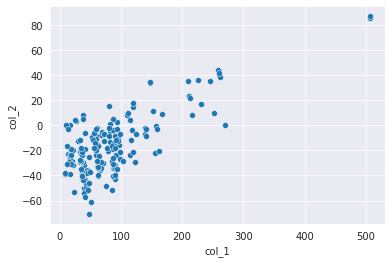

In [ ]:
# 2개 변수관계를 시각화
sns.scatterplot(data=tsvd_titanic_df, x="col_1", y="col_2")
plt.show()

In [ ]:
# 2개 변수로 축소된 데이터프레임에 목적변수를 추가
tsvd_titanic_df['Survived'] = titanic['Survived']

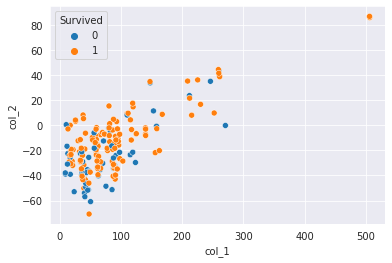

In [ ]:
# 목적변수를 색상으로 시각화
sns.scatterplot(data=tsvd_titanic_df, x='col_1', y='col_2', hue='Survived')
plt.show()

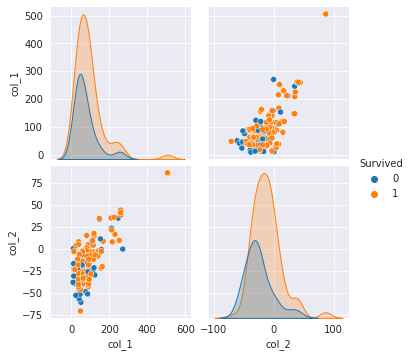

In [ ]:
# 축소된 차원의 값의 관계와 목적변수의 위치를 시각화
sns.pairplot(data=tsvd_titanic_df, hue='Survived')
plt.show()

## t-SNE 차원 축소

### 예제

In [ ]:
titanic

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,38.0,71.2833,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,35.0,53.1000,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,54.0,51.8625,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1,4.0,16.7000,0,0,1,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,1,58.0,26.5500,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,1,47.0,52.5542,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
179,0,33.0,5.0000,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
180,1,56.0,83.1583,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
181,1,19.0,30.0000,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# 차원 축소를 위한 패키지 로드
from sklearn.manifold import TSNE

# 차원 축소
tsne = TSNE(n_components=2)
tsne_titanic = tsne.fit_transform(titanic)

In [ ]:
# 축소된 차원을 DataFrame 으로 변환
tsne_titanic_df = pd.DataFrame(tsne_titanic, columns=['col_1', 'col_2'])
tsne_titanic_df

,col_1,col_2
0,5.489820,-2.423571
1,-0.149498,0.517222
2,-2.467516,2.160885
3,-9.526573,-4.538007
4,-10.012451,4.195076
...,...,...
178,-1.837787,1.474949
179,-13.190500,-2.842548
180,7.911733,-5.178636
181,-8.735973,-2.623483


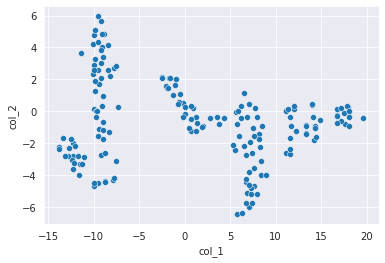

In [ ]:
# 2개 변수관계를 시각화
sns.scatterplot(data=tsne_titanic_df, x="col_1", y="col_2")
plt.show()

In [ ]:
# 2개 변수로 축소된 데이터프레임에 목적변수를 추가
tsne_titanic_df['Survived'] = x_titanic['Survived']

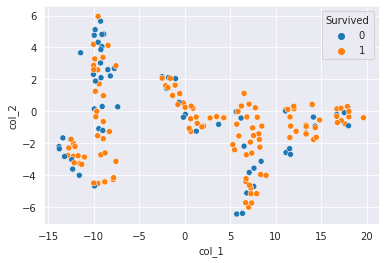

In [ ]:
# 목적변수를 색상으로 시각화
sns.scatterplot(data=tsne_titanic_df, x='col_1', y='col_2', hue='Survived')
plt.show()

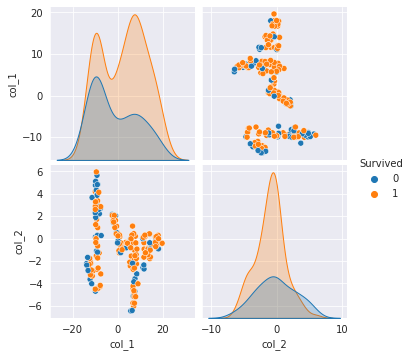

In [ ]:
# 축소된 차원의 값의 관계와 목적변수의 위치를 시각화
sns.pairplot(data=tsne_titanic_df, hue='Survived')
plt.show()